In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import os
import tensorflow as tf
from matplotlib import pyplot as plt
from PIL import Image
import glob as glob

In [ ]:
!git clone https://github.com/thtrieu/darkflow.git

Cloning into 'darkflow'...
remote: Enumerating objects: 2713, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 2713 (delta 0), reused 0 (delta 0), pack-reused 2709
Receiving objects: 100% (2713/2713), 32.98 MiB | 26.26 MiB/s, done.
Resolving deltas: 100% (1761/1761), done.


In [ ]:
%cd darkflow

/content/darkflow


In [ ]:
!pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/darkflow
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for darkflow: filename=darkflow-1.0.0-cp37-cp37m-linux_x86_64.whl size=818275 sha256=2718e7aed5765e2a03eeabad83b075202df632837c3ca02c3a15f03ed7a94db5
  Stored in directory: /tmp/pip-ephem-wheel-cache-dwjzhdaf/wheels/6b/59/6b/2827925e5373062ee5e23af05293638f3020a12d35910df56f
Successfully built darkflow


In [ ]:
!pip install tensorflow==1.13.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/YOLO

/content/YOLO


In [ ]:
!unzip /content/YOLO/yolo_v2.zip

Archive:  /content/YOLO/yolo_v2.zip
  inflating: checkpoint              
  inflating: detections_output_result.pkl  
  inflating: labels.txt              
  inflating: yolo_v2.cfg             
  inflating: yolo_v2-50500.data-00000-of-00001  
  inflating: yolo_v2-50500.index     
  inflating: yolo_v2-50500.meta      
  inflating: yolo_v2-50500.profile   


In [ ]:
from darkflow.net.build import TFNet
import cv2

In [ ]:
MODEL_NAME = 'yolo_v2'

options = {'model': '/content/YOLO/yolo_v2.cfg',
           'labels': '/content/YOLO/labels.txt',
           'backup': '/content/YOLO',
           'load' : 50500,
           'threshold': 0.5,
           'gpu' : 1.0}

tfnet = TFNet(options)

Parsing /content/YOLO/yolo_v2.cfg
Loading None ...
Finished in 0.0001697540283203125s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 76, 76, 256)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (

In [ ]:
def plot_rectangle(bbox, ax, class_name, edgecolor, confidence=None):
    xmin = bbox[0]
    ymin = bbox[1]
    xmax = bbox[2]
    ymax = bbox[3]
    left = xmin
    right = xmax
    top = ymin
    bot = ymax
    ax.add_patch(
        plt.Rectangle((left, top),
                      right-left,
                      bot-top, fill=False,
                      edgecolor=edgecolor, linewidth=3.5)
        )
    label = '{:s}'.format(class_name)
    label_pos_y = top-10
    if confidence:
        label += ' {0:.2f}'.format(confidence)
        label_pos_y = bot+20
    ax.text(left, label_pos_y,label,
            bbox=dict(facecolor=edgecolor, alpha=0.5),
            fontsize=14, color='white')

In [ ]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(label_map)

In [ ]:
def get_label_id(label_name):
    for category in categories:
        if category['name'] == label_name:
            return category['id']

def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

[]


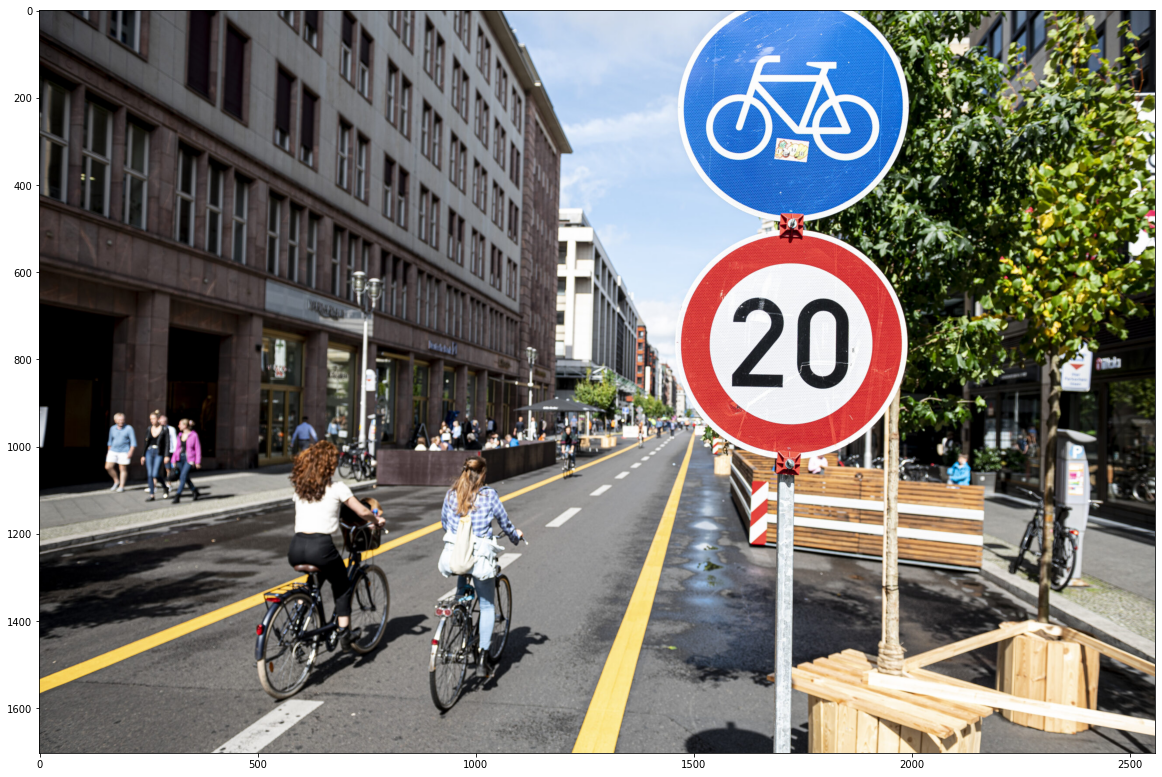

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
image = Image.open('/content/YOLO/cycling-germany_fabian-sommer-picture-alliance-getty-scaled.jpeg')
image_name = os.path.basename('/content/YOLO/cycling-germany_fabian-sommer-picture-alliance-getty-scaled.jpeg')
width, height = image.size
ax.imshow(image)
    
image_np = load_image_into_numpy_array(image)
image_np = image_np[:,:,::-1] # rgb -> bgr
pred_results = tfnet.return_predict(image_np)
print(pred_results)
# for idx, det in enumerate(pred_results):
#   score = det['confidence']
#   if score > min_score_thresh:
#     bbox = det['topleft']['x'], det['topleft']['y'], det['bottomright']['x'], det['bottomright']['y']
#     label = get_label_id(det['label'])
#     plot_rectangle(bbox,ax,category_index[label]['name'],'red', score)
#   plt.draw()
#   fig.tight_layout()
#   plt.axis('off')
#   plt.show()